In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

plt.rcParams['font.sans-serif'] = 'Helvetica'

Data courtesy of Kaggle: https://www.kaggle.com/datasets/drahulsingh/best-selling-books

In [2]:
#load data

df = pd.read_csv(r"C:\Users\bryan\Desktop\books.csv")
df.head()

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre
0,A Tale of Two Cities,Charles Dickens,English,1859,200.0,Historical fiction
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0,Novella
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0,Fantasy
3,And Then There Were None,Agatha Christie,English,1939,100.0,Mystery
4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0,Family saga


In [3]:
#see if there are any missing values

df.isnull().sum()

Book                              0
Author(s)                         0
Original language                 0
First published                   0
Approximate sales in millions     0
Genre                            56
dtype: int64

In [4]:
df.dropna(subset=['Genre'], inplace=True)

In [5]:
df.isnull().sum()

Book                             0
Author(s)                        0
Original language                0
First published                  0
Approximate sales in millions    0
Genre                            0
dtype: int64

In [6]:
df.describe()

,First published,Approximate sales in millions
count,118.000000,118.000000
mean,1961.483051,38.765254
std,44.992636,30.295672
min,1788.000000,10.400000
25%,1945.000000,20.000000
50%,1971.000000,30.000000
75%,1992.750000,50.000000
max,2018.000000,200.000000


In [7]:
df.shape

(118, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 145
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Book                           118 non-null    object 
 1   Author(s)                      118 non-null    object 
 2   Original language              118 non-null    object 
 3   First published                118 non-null    int64  
 4   Approximate sales in millions  118 non-null    float64
 5   Genre                          118 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.5+ KB


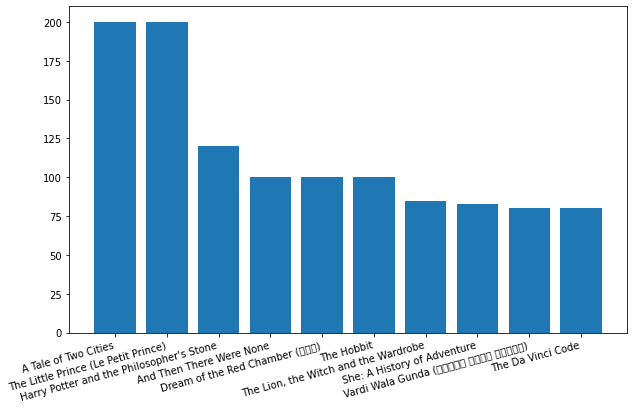

In [39]:
#plot the top ten bestsellers

titles = df.sort_values(by='Approximate sales in millions', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(titles['Book'], titles['Approximate sales in millions'])
plt.xticks(rotation=15, ha='right');

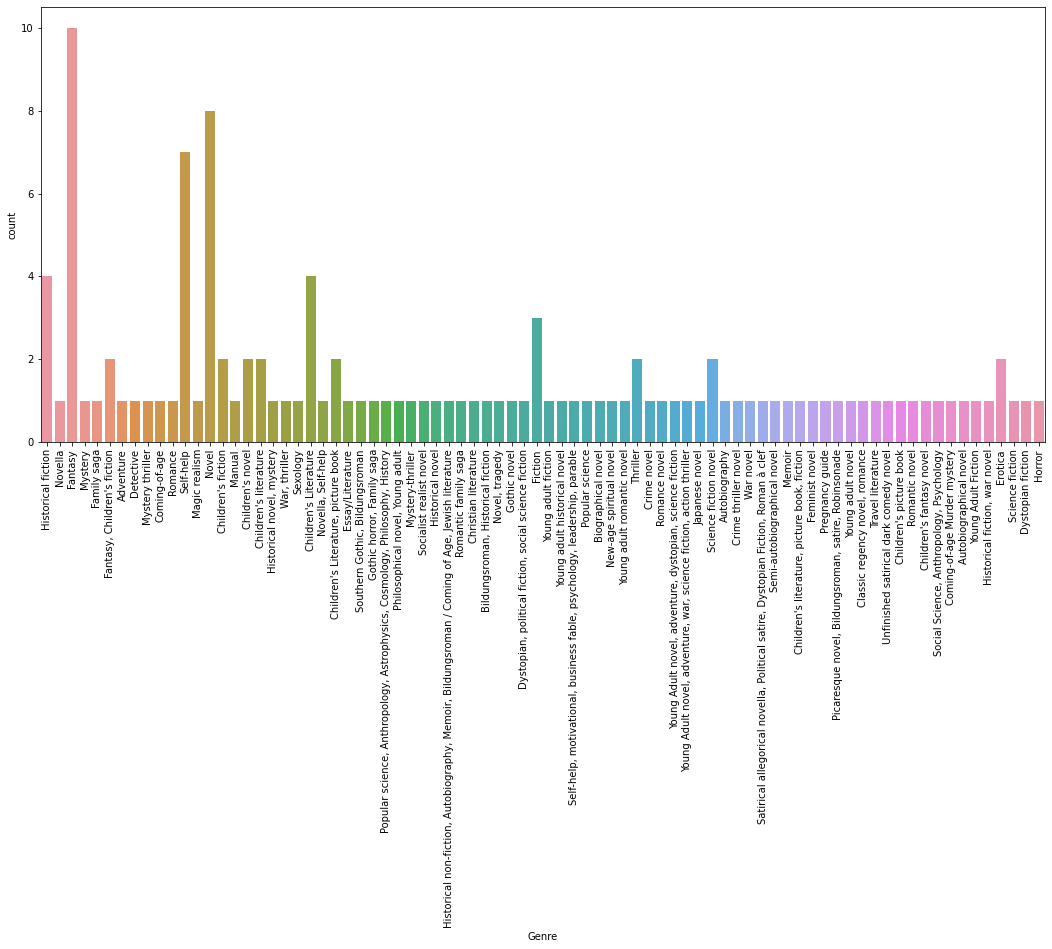

In [10]:
#plot genre count

plt.figure(figsize=(18, 8))
sns.countplot(data=df, x='Genre')
plt.xticks(rotation=90)
plt.show()

In [11]:
df.groupby('Genre').mean()

,First published,Approximate sales in millions
Genre,,
Adventure,1887.0,83.0
Autobiographical novel,1981.0,18.0
Autobiography,1946.0,20.0
"Bildungsroman, Historical fiction",2003.0,31.5
Biographical novel,1934.0,25.0
...,...,...
"Young Adult novel, adventure, war, science fiction, action thriller",2010.0,20.0
Young adult fiction,2008.0,29.0
Young adult historical novel,1945.0,26.0


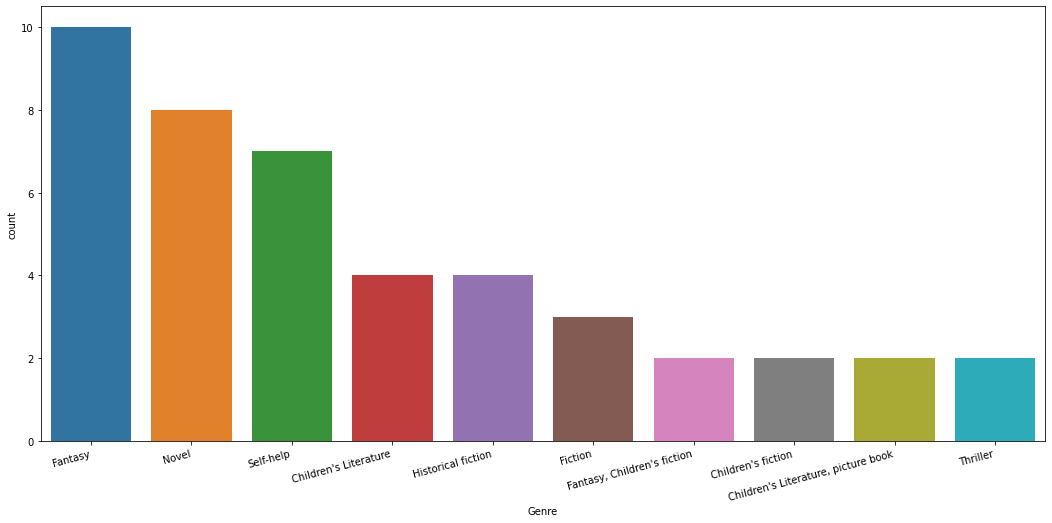

In [12]:
#determine the top 10 genres

top_genres = df['Genre'].value_counts().head(10)
top_genres = top_genres.sort_values(ascending=False) 

plt.figure(figsize=(18, 8))
sns.countplot(data=df[df['Genre'].isin(top_genres.index)], x='Genre', order=top_genres.index)
plt.xticks(rotation=15, ha='right')
plt.show()

In [51]:
df.groupby('Genre').mean()

,First published,Approximate sales in millions
Genre,,
Adventure,1887.0,83.0
Autobiographical novel,1981.0,18.0
Autobiography,1946.0,20.0
"Bildungsroman, Historical fiction",2003.0,31.5
Biographical novel,1934.0,25.0
...,...,...
"Young Adult novel, adventure, war, science fiction, action thriller",2010.0,20.0
Young adult fiction,2008.0,29.0
Young adult historical novel,1945.0,26.0


In [13]:
#determine titles for the Fantasy genre

df[df['Genre'] == 'Fantasy']['Book']

2      Harry Potter and the Philosopher's Stone
5                                    The Hobbit
10      Harry Potter and the Chamber of Secrets
11     Harry Potter and the Prisoner of Azkaban
12          Harry Potter and the Goblet of Fire
13    Harry Potter and the Order of the Phoenix
14       Harry Potter and the Half-Blood Prince
15         Harry Potter and the Deathly Hallows
16                 The Alchemist (O Alquimista)
29                               Watership Down
Name: Book, dtype: object

In [14]:
#determine titles for the novel genre

df[df['Genre'] == 'Novel']['Book']

22                                    Lolita
32                            The Ginger Man
42                             Kane and Abel
51                       Valley of the Dolls
66                          Paul et Virginie
70    Virgin Soil Upturned (Поднятая целина)
74                                 The Shack
86                        Things Fall Apart 
Name: Book, dtype: object

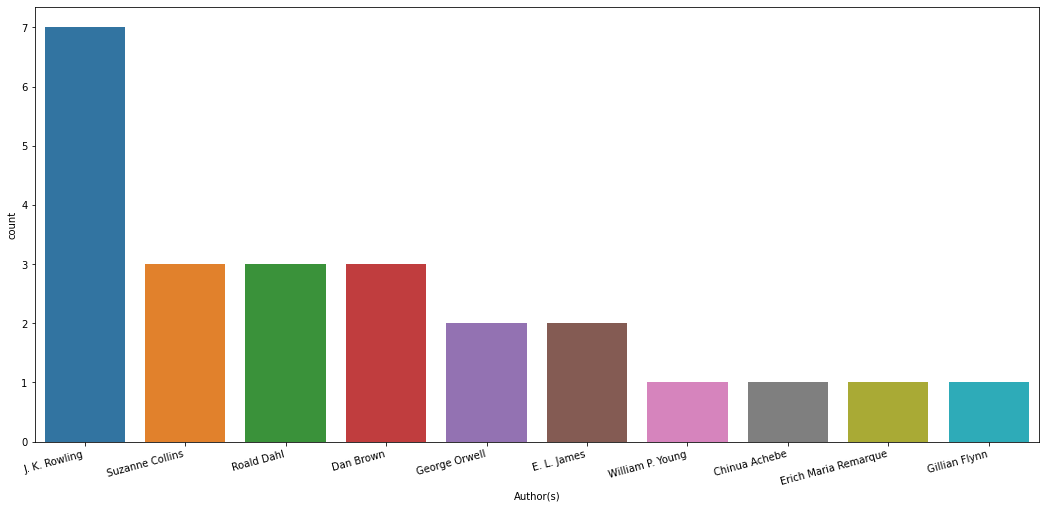

In [15]:
#Determine authors with the most books on the best seller list

top_authors = df['Author(s)'].value_counts().head(10)
top_authors = top_authors.sort_values(ascending=False) 

plt.figure(figsize=(18, 8))
sns.countplot(data=df[df['Author(s)'].isin(top_authors.index)], x='Author(s)', order=top_authors.index)
plt.xticks(rotation=15, ha='right')
plt.show()

In [50]:
df.groupby('Author(s)').mean()

,First published,Approximate sales in millions
Author(s),,
Agatha Christie,1939.0,100.0
Alexander Alexandrovich Fadeyev,1945.0,26.0
Anna Sewell,1877.0,50.0
Anne Frank,1947.0,35.0
Anthony Doerr,2014.0,15.3
...,...,...
Wayne Dyer,1976.0,35.0
William Bradford Huie,1951.0,30.0
William P. Young,2007.0,22.5


In [17]:
#determine titels for J.K. Rowling's books

df[df['Author(s)'] == 'J. K. Rowling']['Book']

2      Harry Potter and the Philosopher's Stone
10      Harry Potter and the Chamber of Secrets
11     Harry Potter and the Prisoner of Azkaban
12          Harry Potter and the Goblet of Fire
13    Harry Potter and the Order of the Phoenix
14       Harry Potter and the Half-Blood Prince
15         Harry Potter and the Deathly Hallows
Name: Book, dtype: object

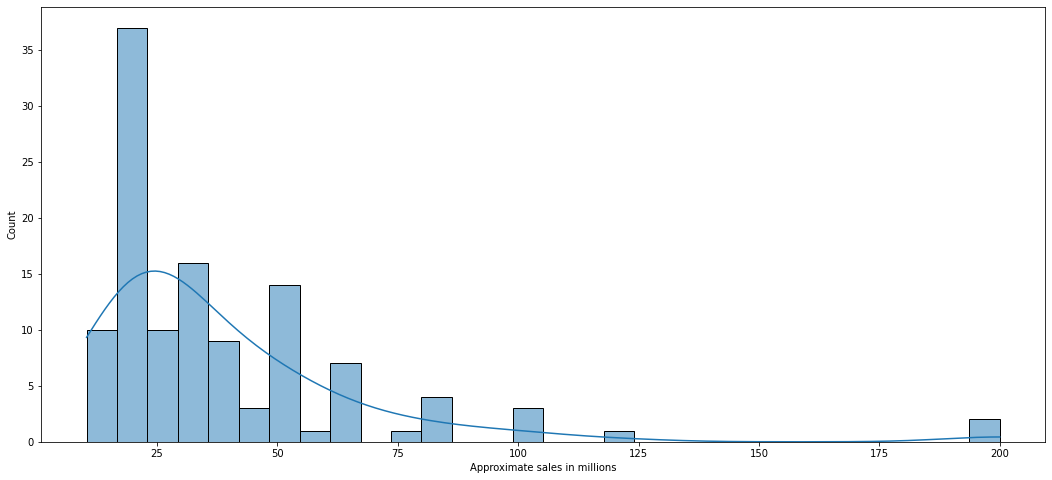

In [18]:
#Plot the sales in millions

plt.figure(figsize=(18, 8))
sns.histplot(data=df, x='Approximate sales in millions', bins=30, kde=True)
plt.show()

In [46]:
df['Approximate sales in millions'].mean()

38.76525423728813

Clearly, there are a number of outliers around 200 million. To isolate these further, let's use a boxplot

<AxesSubplot:xlabel='Approximate sales in millions'>

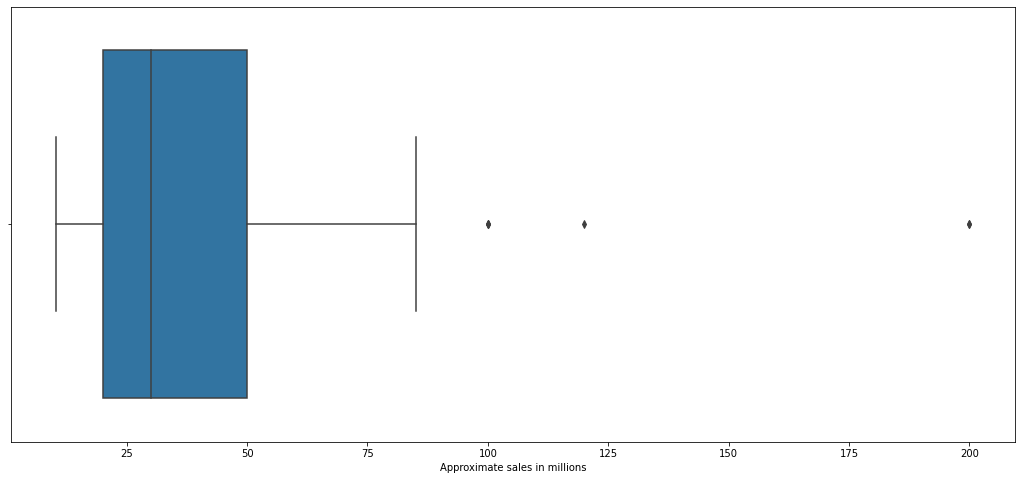

In [19]:
plt.figure(figsize=(18, 8))
sns.boxplot(data=df, x="Approximate sales in millions", hue="Author(s)")

<AxesSubplot:xlabel='Approximate sales in millions'>

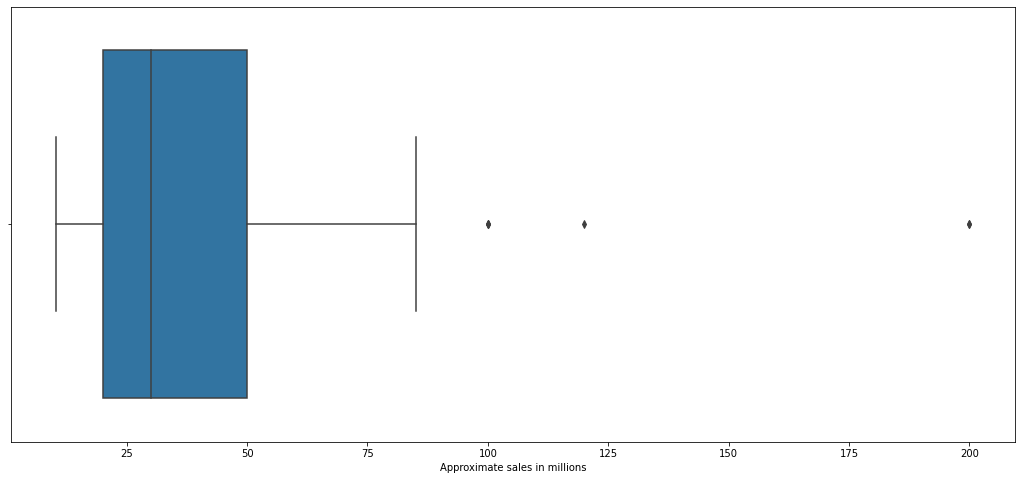

In [20]:
plt.figure(figsize=(18, 8))
sns.boxplot(data=df, x="Approximate sales in millions", hue="Book")

In [21]:
#determine outliers

df[df['Approximate sales in millions'] >= 100.0]

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre
0,A Tale of Two Cities,Charles Dickens,English,1859,200.0,Historical fiction
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0,Novella
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0,Fantasy
3,And Then There Were None,Agatha Christie,English,1939,100.0,Mystery
4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0,Family saga
5,The Hobbit,J. R. R. Tolkien,English,1937,100.0,Fantasy


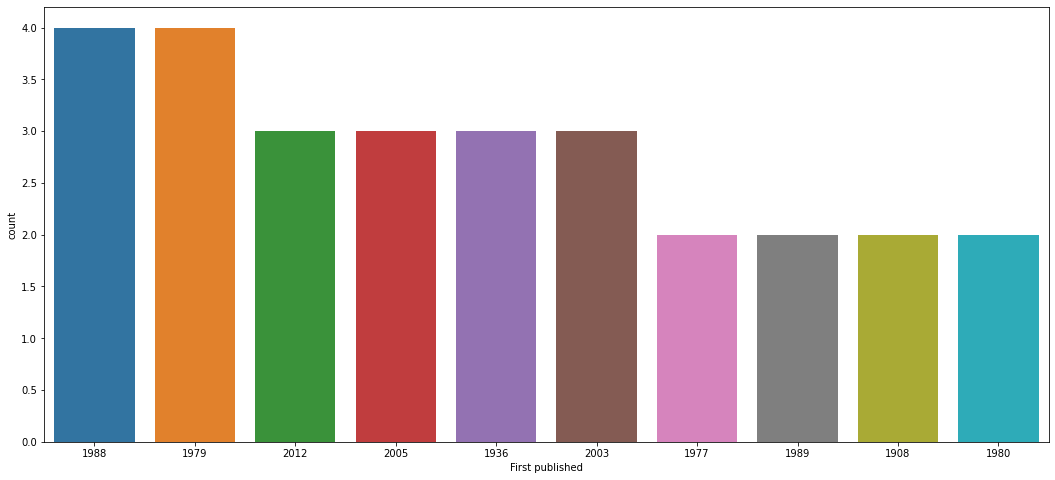

In [22]:
#determine the top 10 years with the most bestsellers

top_years = df['First published'].value_counts().head(10)
top_years = top_years.sort_values(ascending=False)

plt.figure(figsize=(18, 8))
sns.countplot(data=df[df['First published'].isin(top_years.index)], x='First published', order = top_years.index)
plt.xticks(rotation=0)
plt.show()

In [41]:
#what are the bestseller titles in 1988?

df[df['First published'] == 1988]['Book']

16     The Alchemist (O Alquimista)
65          A Brief History of Time
80                   Kitchen (キッチン)
108                         Matilda
Name: Book, dtype: object

In [42]:
#what are the bestseller titles in 1979?

df[df['First published'] == 1979]['Book']

38                                  Flowers in the Attic
42                                         Kane and Abel
112    The Neverending Story (Die unendliche Geschichte)
125                 The Hitchhiker's Guide to the Galaxy
Name: Book, dtype: object

In [45]:
#bestsellers from the next best years for bestsellers

years_to_select = [2012, 2005, 1936, 2003]
df[df['First published'].isin(years_to_select)]['Book']

9                                      The Da Vinci Code
13             Harry Potter and the Order of the Phoenix
14                Harry Potter and the Half-Blood Prince
50                                       The Kite Runner
53               How to Win Friends and Influence People
55                                    Gone with the Wind
59     The Girl with the Dragon Tattoo (Män som hatar...
72                                The Fault in Our Stars
75                             Uncle Styopa (Дядя Стёпа)
83                                             Gone Girl
109                                       The Book Thief
145                                  Fifty Shades Darker
Name: Book, dtype: object

In [27]:
#most popular genres in 1979?

df[df['First published'] == 1979]['Genre']

38     Gothic horror, Family saga
42                          Novel
112         Children's Literature
125               Science fiction
Name: Genre, dtype: object

In [28]:
#most popular genres in 1988?

df[df['First published'] == 1988]['Genre']

16                   Fantasy
65           Popular science
80            Japanese novel
108    Children's Literature
Name: Genre, dtype: object

In [29]:
#most popular genres in 1952?

df[df['First published'] == 1952]['Genre']

31     Children's fiction
100             Self-help
Name: Genre, dtype: object

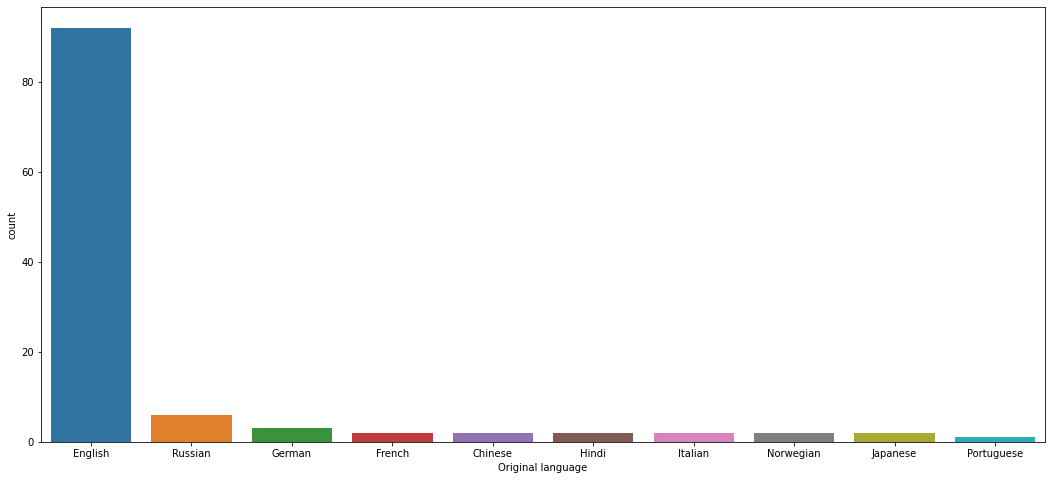

In [40]:
#top language

top_language = df['Original language'].value_counts().head(10)
top_language = top_language.sort_values(ascending=False)

plt.figure(figsize=(18, 8))
sns.countplot(data=df[df['Original language'].isin(top_language.index)], x='Original language', order = top_language.index)
plt.xticks(rotation=0)
plt.show()

In [53]:
fig=px.sunburst(df,path=['Original language', 'Genre','Author(s)'],values='Approximate sales in millions',color='Approximate sales in millions',height=600,width=800,title="Approximate sales of Books in millions")
fig.update_layout(title_pad_l=330)
fig.show();

# Findings


1. The most popular genre is Fantasy, followed by Novel
2. The most popular language is English by a large margin
3. The most lucrative year for bestsellers was 1988, followed closely by 1979
4. The mean sales figures is 38.8 million
5. The standard deviaition of sales is 30.3, which may be negatively influenced by outliers
6. J.K. Rowling has the most sales as a single author, followed by Suzanne Collins, Roald Dahl, and Dan Brown
7. Only 6 books have over 100 million in sales, and two out of those six are considered Fantasy
8. Only 2 books have over 200 million in sales: A Tale of Two Cities and the Little Prince
9. The newest genre to make it to the bestseller list is Young adult romantic novel

# Assertions to Test

1. 6 books with over 100 million in sales may be skewing the data
2. Fantasy may be overrepresented due to the popularity of Rowling's Harry Potter series and The Hobbit

In [31]:
df2 = df.drop(df[df['Author(s)'] == 'J.K. Rowling'].index)

In [32]:
df2 = df.drop(df[df['Book'].str.contains('Potter')].index)

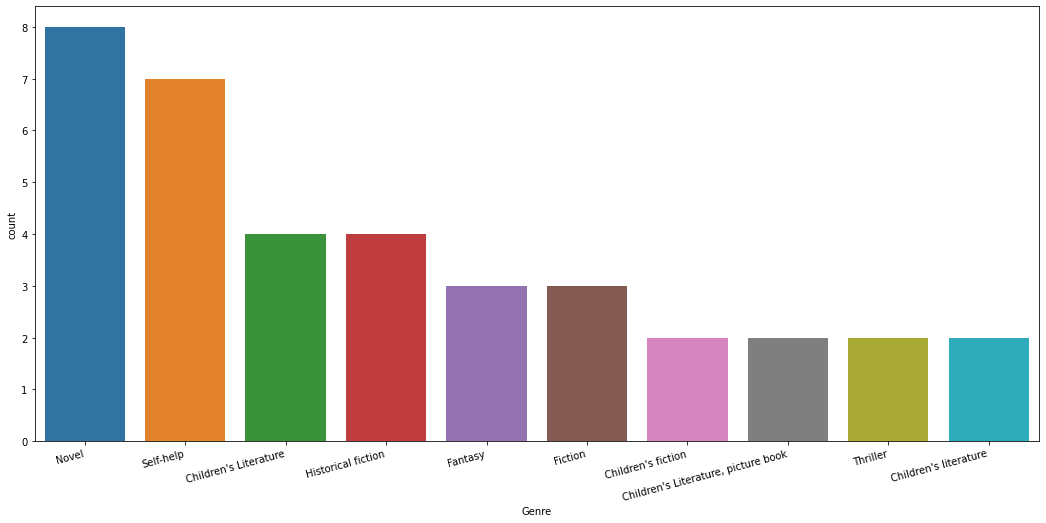

In [33]:
#after removing Harry Potter, what is the most represented genre in terms of bestsellers?

top_genres = df2['Genre'].value_counts().head(10)
top_genres = top_genres.sort_values(ascending=False) 

plt.figure(figsize=(18, 8))
sns.countplot(data=df2[df2['Genre'].isin(top_genres.index)], x='Genre', order=top_genres.index)
plt.xticks(rotation=15, ha='right')
plt.show()

In [34]:
#let's remove authors with over 100 million sales from the dataset to see if Fantasy remains the best represented genre amongst bestsellers

df3 = df.drop(df[df['Author(s)'] == 'J.K. Rowling'].index)
df3 = df.drop(df[df['Author(s)'] == 'Charles Dickens'].index)
df3 = df.drop(df[df['Author(s)'] == 'Antoine de Saint-Exupéry'].index)
df3 = df.drop(df[df['Author(s)'] == 'Agatha Christie'].index)
df3 = df.drop(df[df['Author(s)'] == 'Cao Xueqin'].index)
df3 = df.drop(df[df['Author(s)'] == 'J. R. R. Tolkien'].index)

In [35]:
df3 = df.drop(df[df['Book'].str.contains('Potter')].index)
df3 = df.drop(df[df['Book'] == 'A Tale of Two Cities'].index)
df3 = df.drop(df[df['Book'] == 'The Hobbt'].index)
df3 = df.drop(df[df['Book'] == 'Dream of the Red Chamber (紅樓夢)'].index)
df3 = df.drop(df[df['Book'] == 'The Little Prince (Le Petit Prince)'].index)
df3 = df.drop(df[df['Book'] == 'And Then There Were'].index)

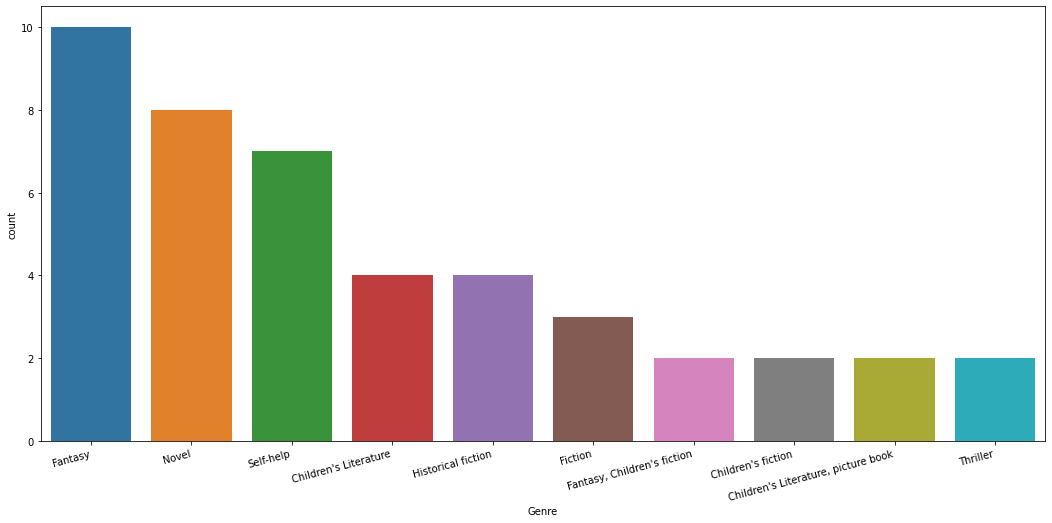

In [36]:
#after removing Harry Potter, what is the most represented genre in terms of bestsellers?

top_genres = df3['Genre'].value_counts().head(10)
top_genres = top_genres.sort_values(ascending=False) 

plt.figure(figsize=(18, 8))
sns.countplot(data=df3[df3['Genre'].isin(top_genres.index)], x='Genre', order=top_genres.index)
plt.xticks(rotation=15, ha='right')
plt.show()

Conclusion: Removing Harry Potter shows that fantasy may be overrepresented, with Novel being the most popular genre; however, removing all books with over 100 million in sales shows that fantasy still remains the most lucrative genre for bestsellers.